**Business Problem**:
One of the global banks would like to understand what factors driving credit card spend are. The
bank want use these insights to calculate credit limit. In order to solve the problem, the bank
conducted survey of 5000 customers and collected data.

The objective of this case study is to understand what's driving the total spend (Primary Card +
Secondary card). Given the factors, predict credit limit for the new applicants.

**Data Availability**:
* Data for the case are available in xlsx format.
* The data have been provided for 5000 customers.
* Detailed data dictionary has been provided for understanding the data in the data.
* Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. You can find the details in the data dictionary

# Data pre-processing

### Importing the necessary liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)

### Importing the Dataset

In [2]:
df = pd.read_excel('Data Set.xlsx')

In [3]:
pd.set_option('max_columns', None)

In [4]:
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [5]:
df.shape

(5000, 130)

# EDA

### Distribution of Spends

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C41D80AE48>,
      dtype=object)

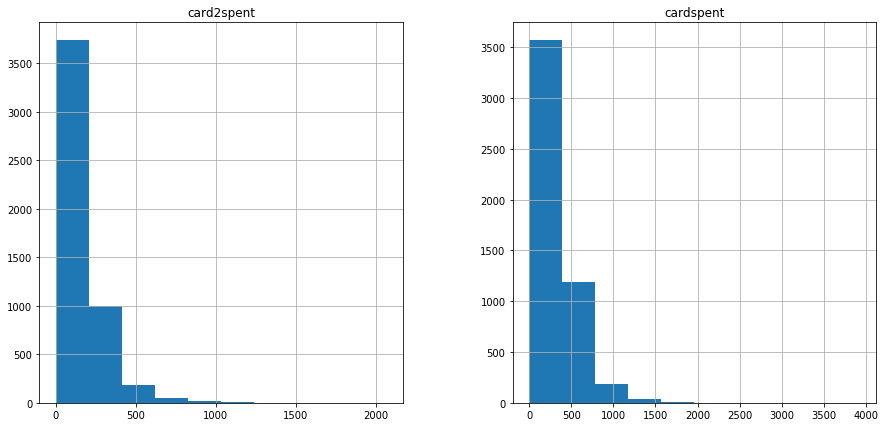

In [6]:
df[['cardspent', 'card2spent']].hist()

**Creating the final target variable by combining the two**

In [7]:
df['total_spend'] = df['cardspent'] + df['card2spent']

#### Dropping 'custid', 'cardspent', and 'card2spent' as they wouldn't serve any purpose here

In [8]:
df.drop(['cardspent', 'card2spent', 'custid'], axis = 1, inplace=True)

In [9]:
df.shape

(5000, 128)

## Segregating Categorical and Numerical Data

In [10]:
num_list = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
categ_list = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [11]:
print(num_list)

['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'longten

In [12]:
print(categ_list)

['birthmonth']


In [13]:
df_num = df[num_list]

In [14]:
df_num.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spend
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


In [15]:
df_categ = df[categ_list]

In [16]:
df_categ.head()

,birthmonth
0,September
1,May
2,June
3,May
4,July


In [17]:
df.dtypes

region           int64
townsize       float64
gender           int64
age              int64
agecat           int64
                ...   
news             int64
response_01      int64
response_02      int64
response_03      int64
total_spend    float64
Length: 128, dtype: object

## Segregation of Numerical and Categorical data

- Some Categorical data is present in the form of numerical values. so we have to seperate them out.

In [18]:
categ_list_num = '''region townsize gender agecat birthmonth edcat jobcat union employ empcat retire inccat default jobsat marital spousedcat homeown hometype address addresscat cars carown cartype carcatvalue carbought carbuy commute commutecat 
commutecar commutemotorcycle commutecarpool commutebus commuterail commutepublic commutebike commutewalk 
commutenonmotor telecommute reason polview polparty polcontrib vote card cardtype cardbenefit cardfee cardtenure 
cardtenurecat card2 card2type card2benefit card2fee card2tenure card2tenurecat active bfast churn tollfree equip 
callcard wireless multline voice pager internet callid callwait forward confer ebill owntv ownvcr owndvd owncd 
ownpda ownpc ownipod owngame ownfax news response_01 response_02 response_03'''.split()

In [19]:
df_categ = df[categ_list_num]

In [20]:
df_categ.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [21]:
df_categ.shape

(5000, 84)

In [22]:
num_list = list(df.columns.difference(categ_list_num))

In [23]:
df_num = df[num_list]

In [24]:
df_num.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncardmon,lncardten,lncreddebt,lnequipmon,lnequipten,lninc,lnlongmon,lnlongten,lnothdebt,lntollmon,lntollten,lnwiremon,lnwireten,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten
0,20,14.25,60.0,14.3,22.0,1.200909,11.1,15,29.50,126.1,13,31,2.656757,4.094345,0.183079,3.384390,4.837075,3.433987,1.871802,3.538057,0.806516,3.367296,5.081715,NaN,NaN,6.50,34.40,2.240091,0,0,0,0,0,0,0,0,3,-1,5,29.0,161.05,149.46,0.00,0.00
1,22,16.00,610.0,6.8,29.0,1.222020,18.6,17,54.85,1975.0,18,15,2.772589,6.413459,0.200505,4.004602,7.588324,2.708050,2.186051,5.800909,0.449788,NaN,NaN,3.821004,7.428660,8.90,330.60,1.567980,6,0,0,0,6,0,0,0,2,-1,39,0.0,0.00,77.54,45.65,1683.55
2,67,23.00,1410.0,18.8,24.0,0.928620,9.9,14,0.00,0.0,21,35,3.135494,7.251345,-0.074056,NaN,NaN,3.555348,3.346389,7.527444,0.930738,NaN,NaN,NaN,NaN,28.40,1858.35,2.536380,3,0,2,1,0,0,0,0,3,13,65,0.0,0.00,359.97,0.00,0.00
3,23,21.00,685.0,8.7,38.0,0.022800,5.7,16,0.00,0.0,26,20,3.044522,6.529419,-3.780995,NaN,NaN,2.995732,1.791759,5.295564,0.110826,NaN,NaN,NaN,NaN,6.00,199.45,1.117200,0,0,0,0,0,0,0,0,5,18,36,0.0,0.00,359.41,0.00,0.00
4,26,17.25,360.0,10.6,32.0,0.214659,1.7,16,0.00,0.0,27,23,2.847812,5.886104,-1.538705,NaN,NaN,3.135494,1.115142,4.305416,-1.735336,2.803360,5.960232,2.947067,6.018106,3.05,74.10,0.176341,0,0,0,0,0,0,0,0,4,13,21,16.5,387.70,507.83,19.05,410.80


# Data Preparation
- Missing Values
- Handling of categorical variables

## Missing Values

In [25]:
df.shape[0]

5000

In [26]:
missing_df = pd.DataFrame(df.isnull().sum()).reset_index()
missing_df.columns = ['ColumnName', 'MissingCount']

In [27]:
missing_df['Percent_Missing'] = round(missing_df['MissingCount'] / df.shape[0],3) * 100

In [28]:
missing_df.sort_values(by='MissingCount', ascending=False)

,ColumnName,MissingCount,Percent_Missing
101,lnwiremon,3656,73.1
103,lnwireten,3656,73.1
93,lnequipten,3296,65.9
91,lnequipmon,3296,65.9
88,lntollten,2622,52.4
...,...,...,...
38,addresscat,0,0.0
37,address,0,0.0
36,hometype,0,0.0
35,homeown,0,0.0


- Dropping all the columns having more than 25% of Missing values in the data

In [29]:
missing_df[missing_df['Percent_Missing'] > 25]['ColumnName']

86      lntollmon
88      lntollten
91     lnequipmon
93     lnequipten
96      lncardmon
98      lncardten
101     lnwiremon
103     lnwireten
Name: ColumnName, dtype: object

In [30]:
missing_cols = missing_df[missing_df['Percent_Missing'] > 25]['ColumnName'].to_list()

In [31]:
missing_cols

['lntollmon',
 'lntollten',
 'lnequipmon',
 'lnequipten',
 'lncardmon',
 'lncardten',
 'lnwiremon',
 'lnwireten']

In [32]:
df.drop(missing_cols, axis = 1, inplace = True)

In [33]:
df.shape

(5000, 120)

**Variables are brought down from 132 to 120**

**Deleting the dropped variables from the list**

In [34]:
for x in missing_cols:
    num_list.remove(x)

**Updating the numeric dataframe**

In [35]:
df_num = df[num_list]

In [36]:
df_num.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten
0,20,14.25,60.0,14.3,22.0,1.200909,11.1,15,29.50,126.1,13,31,0.183079,3.433987,1.871802,3.538057,0.806516,6.50,34.40,2.240091,0,0,0,0,0,0,0,0,3,-1,5,29.0,161.05,149.46,0.00,0.00
1,22,16.00,610.0,6.8,29.0,1.222020,18.6,17,54.85,1975.0,18,15,0.200505,2.708050,2.186051,5.800909,0.449788,8.90,330.60,1.567980,6,0,0,0,6,0,0,0,2,-1,39,0.0,0.00,77.54,45.65,1683.55
2,67,23.00,1410.0,18.8,24.0,0.928620,9.9,14,0.00,0.0,21,35,-0.074056,3.555348,3.346389,7.527444,0.930738,28.40,1858.35,2.536380,3,0,2,1,0,0,0,0,3,13,65,0.0,0.00,359.97,0.00,0.00
3,23,21.00,685.0,8.7,38.0,0.022800,5.7,16,0.00,0.0,26,20,-3.780995,2.995732,1.791759,5.295564,0.110826,6.00,199.45,1.117200,0,0,0,0,0,0,0,0,5,18,36,0.0,0.00,359.41,0.00,0.00
4,26,17.25,360.0,10.6,32.0,0.214659,1.7,16,0.00,0.0,27,23,-1.538705,3.135494,1.115142,4.305416,-1.735336,3.05,74.10,0.176341,0,0,0,0,0,0,0,0,4,13,21,16.5,387.70,507.83,19.05,410.80


## Missing Value imputation

In [37]:
df_num.isnull().sum()

age               0
cardmon           0
cardten           2
carvalue          0
commutetime       2
creddebt          0
debtinc           0
ed                0
equipmon          0
equipten          0
hourstv           0
income            0
lncreddebt        1
lninc             0
lnlongmon         0
lnlongten         3
lnothdebt         1
longmon           0
longten           3
othdebt           0
pets              0
pets_birds        0
pets_cats         0
pets_dogs         0
pets_freshfish    0
pets_reptiles     0
pets_saltfish     0
pets_small        0
reside            0
spoused           0
tenure            0
tollmon           0
tollten           0
total_spend       0
wiremon           0
wireten           0
dtype: int64

In [38]:
df_num['lnlongten'].fillna(df_num['lnlongten'].mean(),inplace=True)
df_num['longten'].fillna(df_num['longten'].mean(),inplace=True)
df_num['cardten'].fillna(df_num['cardten'].mean(),inplace=True)
df_num['commutetime'].fillna(df_num['commutetime'].mean(),inplace=True)
df_num['lnothdebt'].fillna(df_num['lnothdebt'].mean(), inplace=True)
df_num['lncreddebt'].fillna(df_num['lncreddebt'].mean(), inplace=True)

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
df_categ.isnull().sum().sum()

2

In [40]:
df_categ['townsize'].fillna(df['townsize'].median(), inplace=True)

##  Creating Data Audit Report

### Numeric Data

In [41]:
def numeric_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [42]:
nsummary = df_num.apply(lambda x: numeric_summary(x)).T

In [43]:
nsummary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
cardmon,5000.0,0.0,7.721925e+04,15.443850,13.750000,15.007569,2.252271e+02,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,22.750000,34.000000,42.000000,64.250000,188.500000
cardten,5000.0,0.0,3.602392e+06,720.478391,425.000000,922.041026,8.501597e+05,0.000000,0.000000,0.000000,0.000000,0.000000,425.000000,1080.000000,1870.500000,2455.250000,4010.400000,13705.000000
carvalue,5000.0,0.0,1.161629e+05,23.232580,17.000000,21.231637,4.507824e+02,-1.000000,-1.000000,-1.000000,2.490000,9.200000,17.000000,31.100000,52.910000,72.000000,92.001000,99.600000
commutetime,5000.0,0.0,1.267277e+05,25.345538,25.000000,5.877973,3.455056e+01,8.000000,13.000000,16.000000,18.000000,21.000000,25.000000,29.000000,33.000000,35.000000,40.010000,48.000000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
equipmon,5000.0,0.0,6.495655e+04,12.991310,0.000000,19.212943,3.691372e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.800000,42.700000,49.052500,63.300500,106.300000
equipten,5000.0,0.0,2.350882e+06,470.176400,0.000000,912.220624,8.321465e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510.162500,1912.325000,2600.990000,3679.457500,6525.300000


### Categoric Data

In [44]:
def categorical_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

In [45]:
csummary = df_categ.apply(lambda x: categorical_summary(x)).T

In [46]:
csummary

,N,NMISS,ColumnNames,UniqueValues
region,5000,0,5 1027 1 1009 3 1003 2 995 4 ...,"[1, 5, 3, 4, 2]"
townsize,5000,0,1.0 1436 2.0 1048 3.0 909 4.0 85...,"[2.0, 5.0, 4.0, 3.0, 1.0]"
gender,5000,0,"1 2518 0 2482 Name: gender, dtype: int64","[1, 0]"
agecat,5000,0,4 1222 5 1195 6 1068 3 893 2 ...,"[2, 6, 3, 5, 4]"
birthmonth,5000,0,September 458 May 451 June ...,"[September, May, June, July, August, October, ..."
...,...,...,...,...
ownfax,5000,0,"0 4106 1 894 Name: ownfax, dtype: int64","[0, 1]"
news,5000,0,"0 2637 1 2363 Name: news, dtype: int64","[0, 1]"
response_01,5000,0,"0 4582 1 418 Name: response_01, dtype: ...","[0, 1]"
response_02,5000,0,"0 4351 1 649 Name: response_02, dtype: ...","[1, 0]"


## Outlier Analysis - BoxPlot and Histogram

In [47]:
def plot_outliers(df, var):
    '''Function to plot histogram and boxplots'''
    
    #Create 2 subplots for 2 columns
    fig, ax = plt.subplots(ncols=2, sharey= False, figsize = (14,6))
    
    #distribution plots
    sns.distplot(a = df[var], hist=True, kde=False, ax = ax[0])
    
    #barplots 
    sns.boxplot(x = var, data=df, ax=ax[1])
    
    #set title
    plt.suptitle(f'Histogram and Boxplot for {var.capitalize()}')
    plt.show()

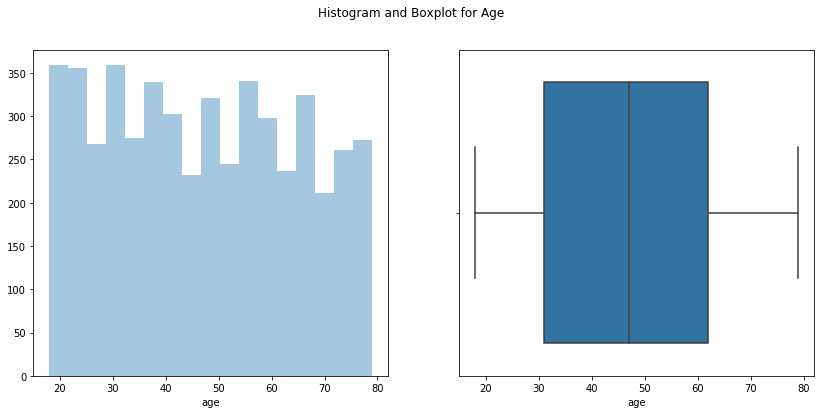

In [48]:
plot_outliers(df_num, 'age')

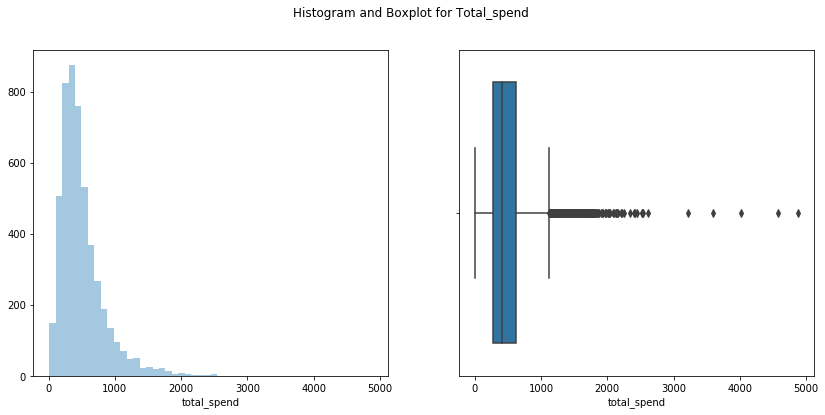

In [49]:
plot_outliers(df_num, 'total_spend')

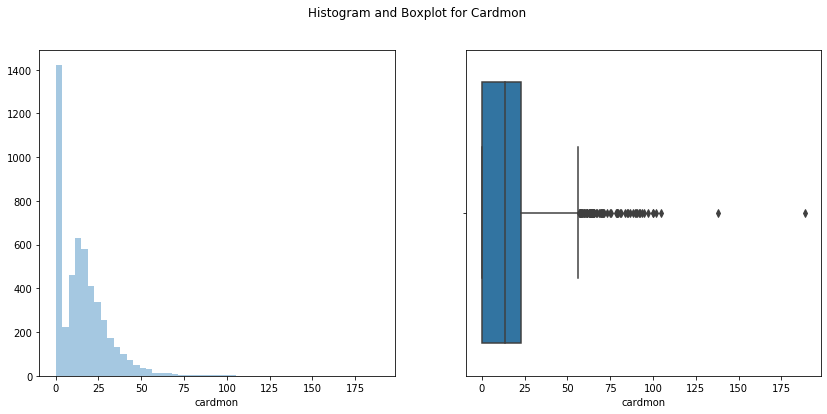

In [50]:
plot_outliers(df_num, 'cardmon')

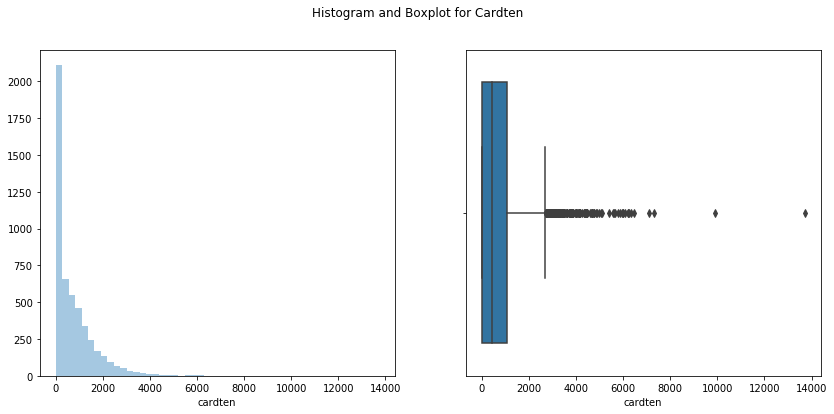

In [51]:
plot_outliers(df_num, 'cardten')

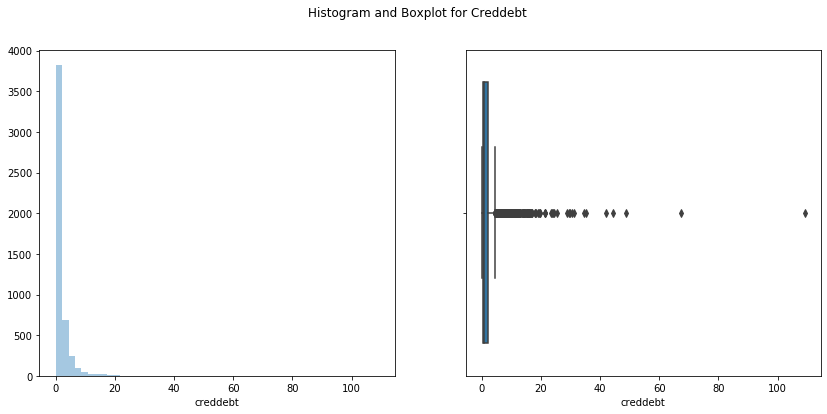

In [52]:
plot_outliers(df_num, 'creddebt')

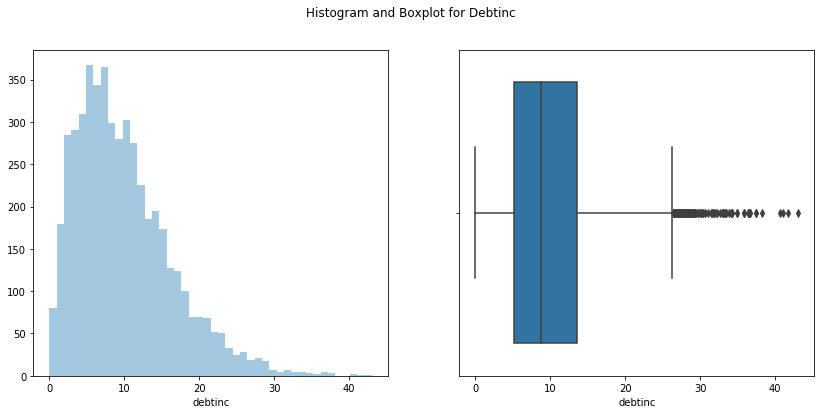

In [53]:
plot_outliers(df_num, 'debtinc')

# Handling Outliers 

In [54]:
def remove_outliers(x):
    x = x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95))
    return x

In [55]:
df_num = df_num.apply(lambda x: remove_outliers(x), axis = 1)

In [56]:
def cat_segment_plot(var):
    
    '''Function to plot segmentation plots of target variable using categorical variables'''
    
    df.boxplot('total_spend', by=var)
    
    plt.show()

# Correlation

In [57]:
df_num.corr()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten
age,1.000000,0.294923,0.418414,0.181351,-0.044421,1.223158e-01,0.040929,-0.091128,-0.096810,0.110151,-0.022339,0.197462,0.140210,0.151193,0.532058,0.583537,0.145340,0.450364,4.576737e-01,0.140949,0.026164,-0.017121,0.015078,0.015840,0.021996,8.770332e-03,-6.802185e-04,0.003584,-0.333282,0.001452,0.622906,0.114123,0.244134,0.286579,-0.017876,0.121031
cardmon,0.294923,1.000000,0.692378,0.134897,-0.017223,8.501138e-02,0.010201,-0.039531,0.045690,0.204476,0.015563,0.148622,0.098689,0.131498,0.412321,0.394794,0.100519,0.405771,4.727858e-01,0.101369,0.012996,-0.017126,-0.010879,0.005891,0.016976,-8.836741e-03,1.358070e-02,0.003193,-0.033364,0.079318,0.433603,0.323438,0.368303,0.336840,0.203674,0.246622
cardten,0.418414,0.692378,1.000000,0.243386,-0.018332,1.591731e-01,0.017275,0.007967,0.161923,0.467300,0.026418,0.269935,0.184629,0.245377,0.644263,0.633082,0.189110,0.623069,8.413517e-01,0.190706,0.021745,-0.019807,-0.004421,0.025489,0.018841,6.230403e-03,2.186618e-03,0.011535,-0.058579,0.133064,0.687311,0.474026,0.698642,0.493325,0.318859,0.520538
carvalue,0.181351,0.134897,0.243386,1.000000,-0.013220,4.439685e-01,0.014586,0.159226,0.091641,0.140899,0.046958,0.766656,0.539592,0.806642,0.181615,0.198652,0.572234,0.151553,2.384946e-01,0.535833,0.018963,0.007585,0.006371,0.017105,0.015340,-1.095269e-02,-5.754753e-03,0.001764,-0.068971,0.041666,0.203230,0.194352,0.234371,0.375895,0.162266,0.189995
commutetime,-0.044421,-0.017223,-0.018332,-0.013220,1.000000,4.036270e-04,0.000836,-0.007180,-0.000196,-0.007492,0.008499,-0.007474,-0.009654,-0.016173,0.007176,0.003816,-0.008386,0.007975,-1.467968e-02,-0.001424,0.008812,0.011312,-0.003741,0.019114,0.000141,8.165165e-03,8.134653e-03,0.009826,0.017710,0.001894,-0.006193,-0.032542,-0.028045,-0.008647,0.002825,-0.007652
creddebt,0.122316,0.085011,0.159173,0.443969,0.000404,1.000000e+00,0.368507,0.105700,0.041689,0.090214,0.037748,0.667064,0.753549,0.489325,0.119769,0.124000,0.494761,0.110347,1.773131e-01,0.667345,0.000814,-0.012015,-0.001636,0.019378,-0.000706,5.111809e-06,-5.782870e-07,-0.005507,-0.043515,0.017063,0.129698,0.140775,0.188026,0.299770,0.115575,0.165536
debtinc,0.040929,0.010201,0.017275,0.014586,0.000836,3.685074e-01,1.000000,0.011716,-0.001333,0.015353,-0.012855,0.017484,0.538875,0.014100,0.010785,0.018614,0.622786,0.012454,1.782679e-02,0.453043,-0.002566,-0.013168,0.003670,-0.002930,-0.007257,1.685914e-02,1.810318e-02,0.009218,-0.023100,-0.027053,0.019263,-0.006862,0.010806,0.024710,-0.001879,0.013534
ed,-0.091128,-0.039531,0.007967,0.159226,-0.007180,1.057004e-01,0.011716,1.000000,0.449337,0.308614,-0.009461,0.174796,0.131918,0.208098,-0.090076,-0.081138,0.157201,-0.087419,-1.064245e-02,0.126778,0.032212,0.008051,0.010229,0.028155,0.022234,-1.301414e-03,4.736845e-03,0.008131,0.023230,0.127124,-0.095170,0.017998,0.061070,0.087137,0.345550,0.244462
equipmon,-0.096810,0.045690,0.161923,0.091641,-0.000196,4.168883e-02,-0.001333,0.449337,1.000000,0.772861,0.014167,0.106411,0.068946,0.128807,-0.027116,-0.023071,0.088038,-0.035648,1.091701e-01,0.069147,0.028072,-0.017879,0.007511,0.009498,0.022458,1.135006e-02,-3.656302e-03,0.034504,0.022304,0.072566,-0.032248,0.120106,0.220678,0.189335,0.591387,0.474086
equipten,0.110151,0.204476,0.467300,0.140899,-0.007492,9.021363e-02,0.015353,0.308614,0.772861,1.000000,0.019564,0.171281,0.124505,0.172110,0.249388,0.265946,0.131188,0.211462,4.264514e-01,0.119843,0.023437,-0.027073,0.011325,0.021899,0.015201,9.014117e-03,-3.583955e-03,0.032054,-0.009746,0.119532,0.280833,0.245451,0.468177,0.313978,0.576359,0.687846


## Categorical Variable Analysis

In [58]:
import scipy.stats as stats

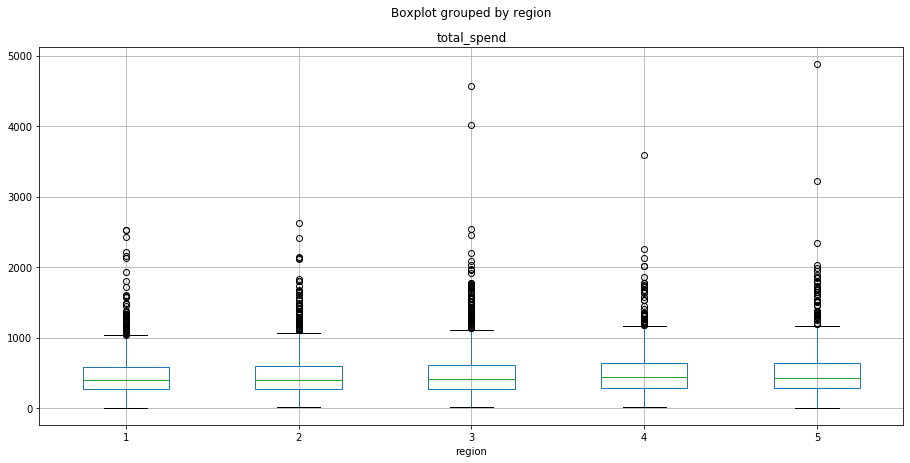

In [59]:
cat_segment_plot('region')

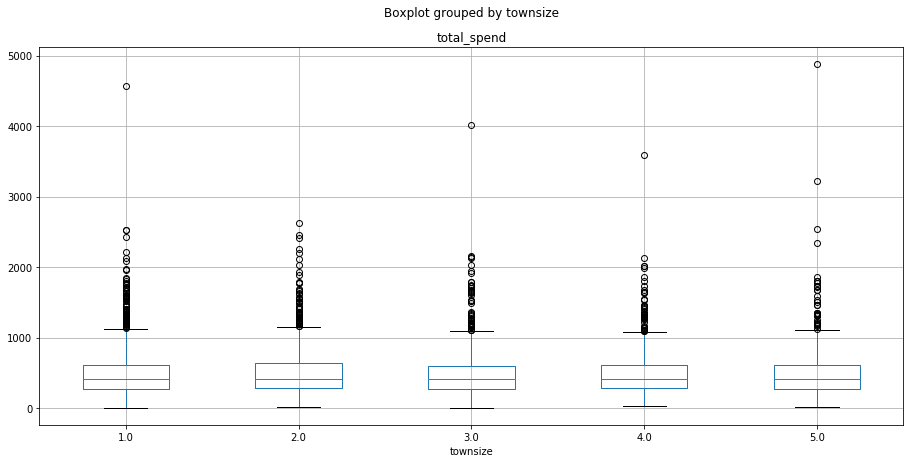

In [60]:
cat_segment_plot('townsize')

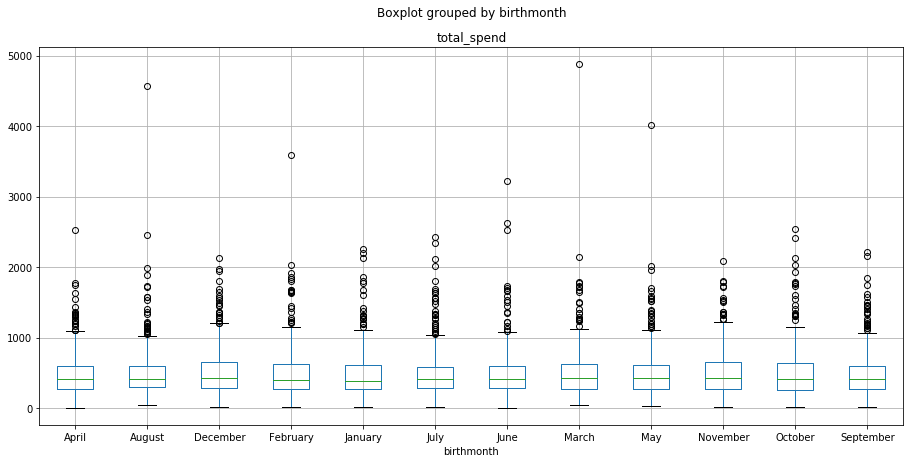

In [61]:
cat_segment_plot('birthmonth')

# Feature Selection using ANOVA

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [63]:
dictp = {}
selected_cols_categ = []

# Performing the ANOVA and selecting variables with p value < 0.05

for col in categ_list_num:
    mod = ols('total_spend ~ ' + col, data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    p_value = round(aov_table["PR(>F)"][col],4)
    
    if p_value < 0.05:
        dictp[col] = p_value
        selected_cols_categ.append(col)

# Dictionary of values with p-value

In [64]:
dictp

{'region': 0.0034,
 'gender': 0.0,
 'agecat': 0.0004,
 'edcat': 0.0,
 'employ': 0.0,
 'empcat': 0.0,
 'retire': 0.0,
 'inccat': 0.0,
 'jobsat': 0.0,
 'spousedcat': 0.0089,
 'homeown': 0.0,
 'address': 0.0,
 'addresscat': 0.0,
 'carown': 0.0,
 'carcatvalue': 0.0,
 'commutebike': 0.0223,
 'vote': 0.0,
 'card': 0.0,
 'cardtenure': 0.0,
 'cardtenurecat': 0.0,
 'card2': 0.0,
 'card2fee': 0.0346,
 'card2tenure': 0.0,
 'card2tenurecat': 0.0,
 'tollfree': 0.0,
 'equip': 0.0004,
 'callcard': 0.025,
 'wireless': 0.0,
 'multline': 0.0004,
 'voice': 0.0247,
 'pager': 0.0001,
 'internet': 0.0,
 'callid': 0.0002,
 'callwait': 0.0,
 'forward': 0.0001,
 'confer': 0.0,
 'owntv': 0.0,
 'ownvcr': 0.0,
 'owndvd': 0.0,
 'owncd': 0.0,
 'ownpda': 0.0,
 'ownpc': 0.0004,
 'ownipod': 0.0239,
 'ownfax': 0.0,
 'news': 0.0065,
 'response_03': 0.0013}

# Sorting dictionary based on p-value

In [65]:
sorted_p = sorted(dictp.items(), key=lambda x: x[1])

In [66]:
sorted_p

[('gender', 0.0),
 ('edcat', 0.0),
 ('employ', 0.0),
 ('empcat', 0.0),
 ('retire', 0.0),
 ('inccat', 0.0),
 ('jobsat', 0.0),
 ('homeown', 0.0),
 ('address', 0.0),
 ('addresscat', 0.0),
 ('carown', 0.0),
 ('carcatvalue', 0.0),
 ('vote', 0.0),
 ('card', 0.0),
 ('cardtenure', 0.0),
 ('cardtenurecat', 0.0),
 ('card2', 0.0),
 ('card2tenure', 0.0),
 ('card2tenurecat', 0.0),
 ('tollfree', 0.0),
 ('wireless', 0.0),
 ('internet', 0.0),
 ('callwait', 0.0),
 ('confer', 0.0),
 ('owntv', 0.0),
 ('ownvcr', 0.0),
 ('owndvd', 0.0),
 ('owncd', 0.0),
 ('ownpda', 0.0),
 ('ownfax', 0.0),
 ('pager', 0.0001),
 ('forward', 0.0001),
 ('callid', 0.0002),
 ('agecat', 0.0004),
 ('equip', 0.0004),
 ('multline', 0.0004),
 ('ownpc', 0.0004),
 ('response_03', 0.0013),
 ('region', 0.0034),
 ('news', 0.0065),
 ('spousedcat', 0.0089),
 ('commutebike', 0.0223),
 ('ownipod', 0.0239),
 ('voice', 0.0247),
 ('callcard', 0.025),
 ('card2fee', 0.0346)]

In [67]:
selected_cols_categ = [x for x, y in sorted_p]

In [68]:
print('Categorical variables before feature selection: ' + str(len(categ_list_num)))
print('Categorical variables after feature selection:  ' + str(len(selected_cols_categ)))

Categorical variables before feature selection: 84
Categorical variables after feature selection:  46


In [69]:
selected_cols_categ

['gender',
 'edcat',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'jobsat',
 'homeown',
 'address',
 'addresscat',
 'carown',
 'carcatvalue',
 'vote',
 'card',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2tenure',
 'card2tenurecat',
 'tollfree',
 'wireless',
 'internet',
 'callwait',
 'confer',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownfax',
 'pager',
 'forward',
 'callid',
 'agecat',
 'equip',
 'multline',
 'ownpc',
 'response_03',
 'region',
 'news',
 'spousedcat',
 'commutebike',
 'ownipod',
 'voice',
 'callcard',
 'card2fee']

# Updating our 'df_categ'

In [70]:
df_categ = df[selected_cols_categ]

In [71]:
df_categ.head()

,gender,edcat,employ,empcat,retire,inccat,jobsat,homeown,address,addresscat,carown,carcatvalue,vote,card,cardtenure,cardtenurecat,card2,card2tenure,card2tenurecat,tollfree,wireless,internet,callwait,confer,owntv,ownvcr,owndvd,owncd,ownpda,ownfax,pager,forward,callid,agecat,equip,multline,ownpc,response_03,region,news,spousedcat,commutebike,ownipod,voice,callcard,card2fee
0,1,3,0,1,0,2,1,0,0,1,1,1,1,3,2,2,5,3,2,1,0,0,1,1,1,1,1,0,0,0,1,1,0,2,1,1,0,0,1,0,-1,0,1,1,1,0
1,0,4,0,1,0,1,1,1,2,1,1,1,0,2,4,2,4,4,2,0,1,4,0,0,1,1,1,1,1,1,1,1,1,2,1,1,1,0,5,1,-1,1,1,1,1,0
2,1,2,16,5,0,2,4,1,30,5,1,1,0,2,35,5,4,25,5,0,0,0,0,0,1,1,1,1,0,0,0,0,0,6,0,1,0,0,3,1,2,0,0,0,1,0
3,0,3,0,1,0,1,2,1,3,2,1,1,0,2,5,2,3,5,2,0,0,2,0,0,1,1,1,1,0,0,0,0,0,2,0,1,1,0,4,1,4,0,1,0,1,0
4,0,3,1,1,0,1,1,0,3,2,0,1,0,4,8,3,1,9,3,1,1,3,1,1,1,1,1,1,0,0,0,1,1,3,0,0,1,0,2,0,2,0,0,1,1,0


In [72]:
df_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   gender          5000 non-null   int64
 1   edcat           5000 non-null   int64
 2   employ          5000 non-null   int64
 3   empcat          5000 non-null   int64
 4   retire          5000 non-null   int64
 5   inccat          5000 non-null   int64
 6   jobsat          5000 non-null   int64
 7   homeown         5000 non-null   int64
 8   address         5000 non-null   int64
 9   addresscat      5000 non-null   int64
 10  carown          5000 non-null   int64
 11  carcatvalue     5000 non-null   int64
 12  vote            5000 non-null   int64
 13  card            5000 non-null   int64
 14  cardtenure      5000 non-null   int64
 15  cardtenurecat   5000 non-null   int64
 16  card2           5000 non-null   int64
 17  card2tenure     5000 non-null   int64
 18  card2tenurecat  5000 non-nul

# Creating Dummies

In [73]:
def get_dummies(df, col):
    dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df.drop(col, axis=1, inplace=True)
    df = pd.concat([df, dummy], axis=1)
    return df

In [74]:
for cols in selected_cols_categ:
    df_categ = get_dummies(df_categ, cols)

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
df_categ.head()

,gender_1,edcat_2,edcat_3,edcat_4,edcat_5,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,jobsat_2,jobsat_3,jobsat_4,jobsat_5,homeown_1,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carown_0,carown_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,vote_1,card_2,card_3,card_4,card_5,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,tollfree_1,wireless_1,internet_1,internet_2,internet_3,internet_4,callwait_1,confer_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownfax_1,pager_1,forward_1,callid_1,agecat_3,agecat_4,agecat_5,agecat_6,equip_1,multline_1,ownpc_1,response_03_1,region_2,region_3,region_4,region_5,news_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,commutebike_1,ownipod_1,voice_1,callcard_1,card2fee_1
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,

In [76]:
df_categ.shape

(5000, 262)

## Concatenating both categorical and numerical DataFrames

In [77]:
df_final = pd.concat([df_num, df_categ], axis=1)

In [78]:
df_final.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,total_spend,wiremon,wireten,gender_1,edcat_2,edcat_3,edcat_4,edcat_5,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,jobsat_2,jobsat_3,jobsat_4,jobsat_5,homeown_1,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carown_0,carown_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,vote_1,card_2,card_3,card_4,card_5,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,tollfree_1,wireless_1,internet_1,internet_2,internet_3,internet_4,callwait_1,confer_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownfax_1,pager_1,forward_1,callid_1,agecat_3,agecat_4,agecat_5,agecat_6,equip_1,multline_1,ownpc_1,response_03_1,region_2,region_3,region_4,region_5,news_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,commutebike_1,ownipod_1,voice_1,callcard_1,card2fee_1
0,20.0,14.25,60.0000,14.3,22.0,1.200909,11.1,15.0,29.50,126.1000,13.0,31.0,0.183079,3.433987,1.871802,3.538057,0.806516,6.50,34.4000,2.240091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,29.0,131.94,131.940,0.00,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0

## Checking the distribution of the Target variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C41DBB7AC8>]],
      dtype=object)

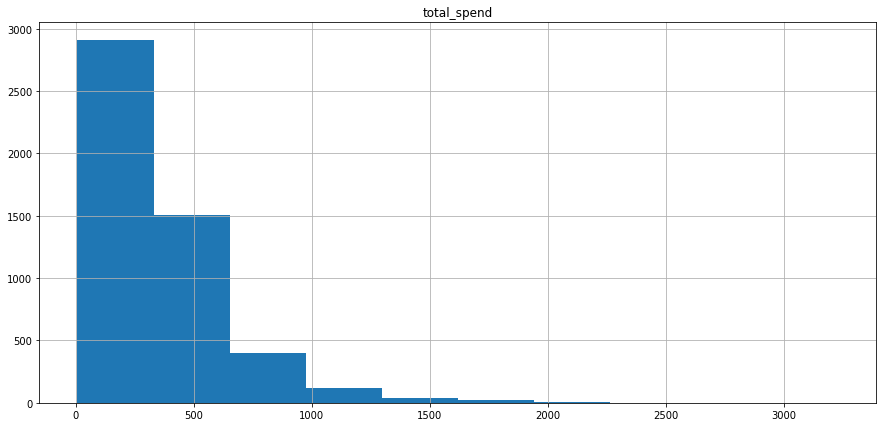

In [79]:
df_final[['total_spend']].hist()

In [80]:
df_final['total_spend'].skew()

1.9468412602463965

### As we can see 'total_spend' is positively skewed. So, let's try applying log transformation on it.

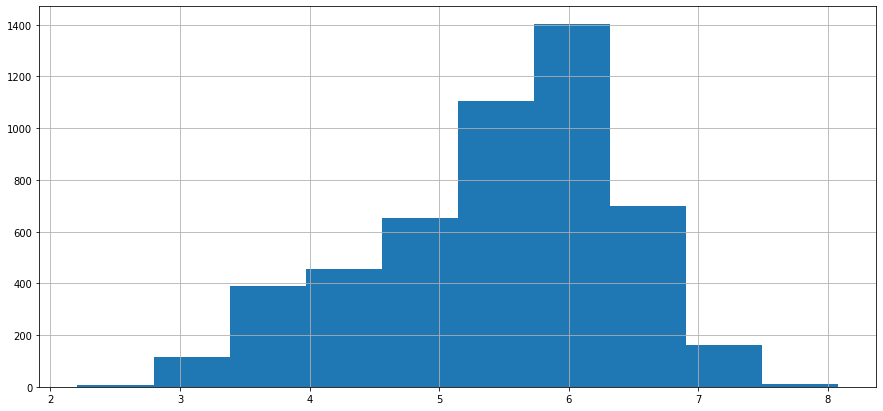

In [81]:
df_final['total_spend'].apply(lambda x: np.log(x + 1)).hist()

### Log transformation works! Now let's create a separate column named 'ln_total_spend'

In [82]:
df_final['ln_total_spend'] = df_final['total_spend'].apply(lambda x: np.log(x + 1))

In [83]:
df_final['ln_total_spend'].skew()

-0.5241226867836918

#### Although, it is still a little skewed but not as nearly as it was before.

### Dropping the original 'total_spend'

In [84]:
df_final.drop('total_spend', axis=1, inplace=True)

In [85]:
df_final.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1,edcat_2,edcat_3,edcat_4,edcat_5,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,jobsat_2,jobsat_3,jobsat_4,jobsat_5,homeown_1,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carown_0,carown_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,vote_1,card_2,card_3,card_4,card_5,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,tollfree_1,wireless_1,internet_1,internet_2,internet_3,internet_4,callwait_1,confer_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownfax_1,pager_1,forward_1,callid_1,agecat_3,agecat_4,agecat_5,agecat_6,equip_1,multline_1,ownpc_1,response_03_1,region_2,region_3,region_4,region_5,news_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,commutebike_1,ownipod_1,voice_1,callcard_1,card2fee_1,ln_total_spend
0,20.0,14.25,60.0000,14.3,22.0,1.200909,11.1,15.0,29.50,126.1000,13.0,31.0,0.183079,3.433987,1.871802,3.538057,0.806516,6.50,34.4000,2.240091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,29.0,131.94,0.00,0.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,

In [86]:
df_final.shape

(5000, 298)

## Splitting the dataset into train and test sets

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df_final.drop('ln_total_spend', axis=1)
y = df_final['ln_total_spend']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size=0.77)

# Creating Model Pipeline

In [90]:
from sklearn.pipeline import make_pipeline

## Standard Scaler

In [91]:
from sklearn.preprocessing import StandardScaler

## Importing Penalize Regression Models

In [92]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

## Importing Ensemble Regression Models

In [93]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Pipeline Dictionary

In [94]:
pipelines = {'lasso' : make_pipeline(StandardScaler(), Lasso(random_state = 101)),
             'ridge' : make_pipeline(StandardScaler(), Ridge(random_state = 101)),
             'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state = 101)),
             'rfr'   : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=101)),
             'gboost': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=101))}

# Hyperparameter tuning

### Lasso hyperparameters

In [95]:
lasso_hyperparameters = {'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]}

### Ridge hyperparameters

In [96]:
ridge_hyperparameters = {'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]}

### Elastic Net hyperparameters

In [97]:
enet_hyperparameters = {'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
                        'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9]}

### Random forest hyperparameters

In [98]:
rfr_hyperparameters = {'randomforestregressor__n_estimators': [100, 200],
                      'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]}

### Gradient Boost hyperparameters

In [99]:
gboost_hyperparameters = {'gradientboostingregressor__n_estimators': [100, 200],
                          'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                          'gradientboostingregressor__max_depth': [1, 3, 5]}

## Hyperparameters Dictionary

In [100]:
hyperparameters = {'lasso' : lasso_hyperparameters,
                   'ridge' : ridge_hyperparameters,
                   'enet'  : enet_hyperparameters,
                   'rfr'   : rfr_hyperparameters,
                   'gboost': gboost_hyperparameters}

## Fitting and Tuning Models with Cross-Validation (5 Fold)

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
models_fit = {}

for name, pipeline in pipelines.items():
    
    model = GridSearchCV(pipeline , hyperparameters[name], cv = 5, verbose=2, n_jobs=3, return_train_score=True)
    
    model.fit(X_train, y_train)
     
    models_fit[name] = model
    
    print(name, 'fit is complete.')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    4.4s finished


lasso fit is complete.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  40 out of  45 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    2.0s finished


ridge fit is complete.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.5s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   15.3s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:   18.3s finished


enet fit is complete.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  1.6min finished


rfr fit is complete.
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   52.0s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  2.5min finished


gboost fit is complete.


## Let's check the 'best_score_' (R^2) for each model.

In [103]:
for name, model in models_fit.items():
    print(name, model.best_score_)

lasso 0.720223215033279
ridge 0.7084872529231262
enet 0.7199467563883575
rfr 0.8226308463860867
gboost 0.8223328279036985


## Metrics Evaluation: R2 Score, Root Mean Squared Error

In [104]:
from sklearn.metrics import r2_score, mean_squared_error

### R2 on test data

In [105]:
for name, model  in models_fit.items():
    y_pred = model.predict(X_test)
    print(name)
    print('=========================')
    print('R2  :' , r2_score(y_test, y_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

lasso
R2  : 0.6873685396207123
RMSE:  0.5371301885600032


ridge
R2  : 0.6811492637832395
RMSE:  0.5424465286323364


enet
R2  : 0.6869292409942287
RMSE:  0.5375074342171258


rfr
R2  : 0.8093371179601269
RMSE:  0.41946555022305837


gboost
R2  : 0.8074062447549255
RMSE:  0.42158419680058407




### Random Forest Regressor is giving the highest R2 Score, so we will use that model for prediction

In [106]:
rfr_model = models_fit['rfr'].best_estimator_.named_steps['randomforestregressor']

In [107]:
model_1 = models_fit['rfr']

In [108]:
model_1.best_params_

{'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 200}

In [109]:
model_1.best_score_

0.8226308463860867

In [110]:
model_1.cv_results_['mean_test_score']

array([0.82157758, 0.82263085, 0.78042094, 0.78163435, 0.81459922,
       0.81565923])

In [111]:
np.mean(model_1.cv_results_['mean_test_score'])

0.8060870274894053

In [112]:
rfr_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [113]:
rfr_model.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=70431583, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=225658379, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity

## Predict test set using fitted Random Forest Regressor

In [114]:
pred = models_fit['rfr'].predict(X_test)

## Metrics Evaluation: R2 Score, Root Mean Squared Error

In [115]:
print('R2 score:' , r2_score(y_test, pred))
print('RMSE:    ', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.8093371179601269
RMSE:     0.41946555022305837


# Scatter Plot between Actual and Predicted Target Variable (Log)

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales (Log scale)')

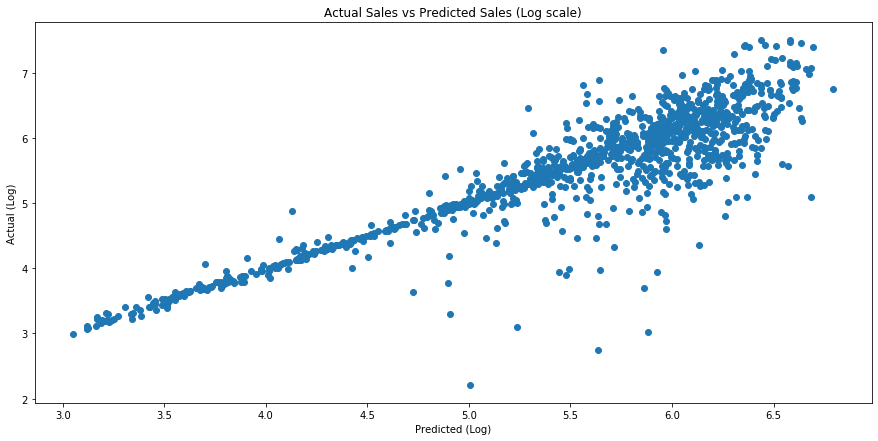

In [116]:
rfr_pred = models_fit['rfr'].predict(X_test)
plt.scatter(rfr_pred, y_test)
plt.xlabel('Predicted (Log)')
plt.ylabel('Actual (Log)')
plt.title('Actual Sales vs Predicted Sales (Log scale)')

# Scatter Plot between Actual and Predicted Target Variable

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

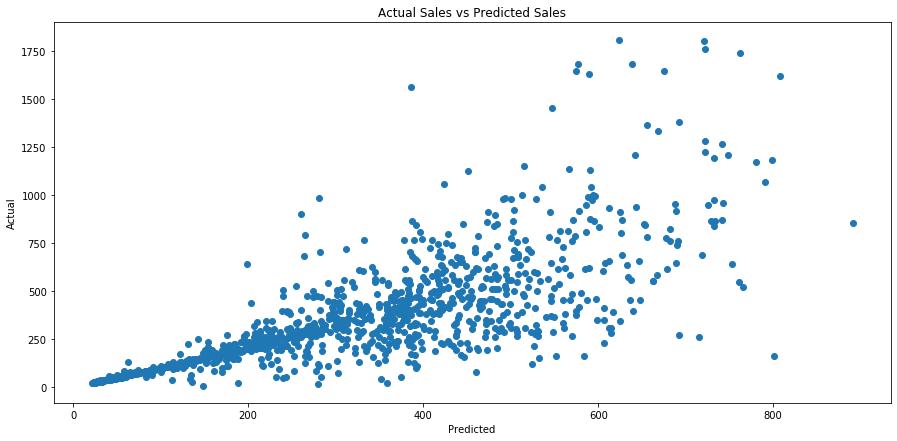

In [117]:
rfr_pred = models_fit['rfr'].predict(X_test)
plt.scatter(np.exp(rfr_pred), np.exp(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual Sales vs Predicted Sales')

# Top 10 Key drivers for 'Credit Card Spend'

In [118]:
best_model = models_fit['rfr'].best_estimator_.named_steps['randomforestregressor']

Text(0, 0.5, 'Variable Name')

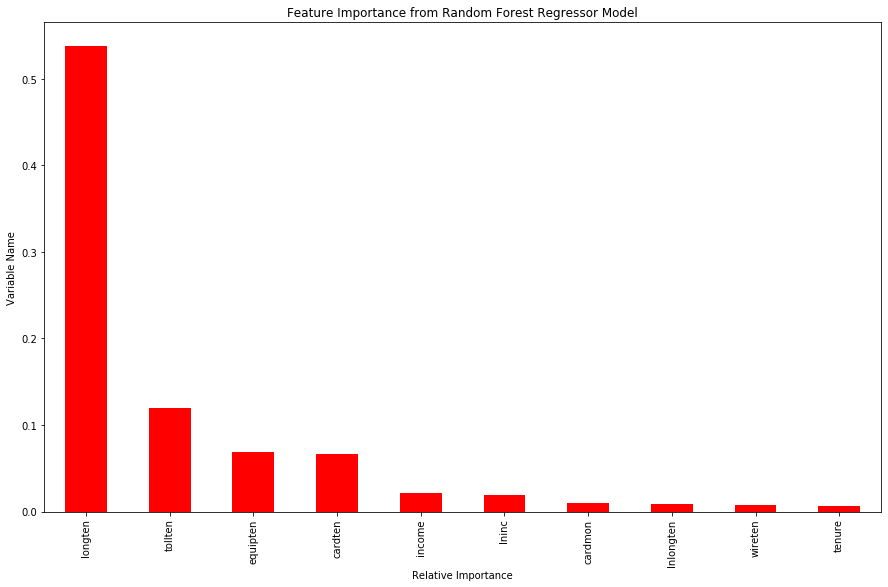

In [119]:
feat_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar', color='r', figsize=(15, 9))

plt.title('Feature Importance from Random Forest Regressor Model')
plt.xlabel('Relative Importance')
plt.ylabel('Variable Name')

# Let's save this model as a Pickle File

In [120]:
import pickle
with open('final_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

## Selecting Top 7 important features

In [195]:
selected_feats = feat_importances.nlargest(7).index.to_list()

In [205]:
selected_feats

['longten', 'tollten', 'equipten', 'cardten', 'income', 'lninc', 'cardmon']

## Let's create new X_train and X_test using there features

In [196]:
X_train_new = X_train[selected_feats]
X_test_new = X_test[selected_feats]

In [197]:
X_train_new.shape

(3850, 7)

In [198]:
X_test_new.shape

(1150, 7)

## Now that we have reduced the features, let's create a linear model.

In [199]:
from sklearn.linear_model import LinearRegression

In [200]:
lm = LinearRegression()

In [201]:
lm.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Score for training and testing set

In [206]:
print(f'Training Score: {lm.score(X_train_new, y_train)}')
print(f'Testing Score: {lm.score(X_test_new, y_test)}')

Training Score: 0.37901775557793593
Testing Score: 0.3538386160775422


### Predict variable

In [203]:
y_pred_lm = lm.predict(X_test_new)

## R^2 Score

In [204]:
r2_score(y_test, y_pred_lm)

0.3538386160775422